# Step 1: Load and Preprocess the Data

In [11]:
!pip install opencv-python


In [22]:
import tensorflow as tf
import os
import cv2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


def load_custom_dataset(data_path, img_size=(28, 28)):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_path))  # Sort to maintain label consistency
    for label, class_name in enumerate(class_names):
        label_path = os.path.join(data_path, class_name)
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
            img = cv2.resize(img, img_size)  # Resize to 28x28
            images.append(img)
            labels.append(label)  # Assign label based on folder index

    images = np.array(images).astype('float32') / 255.0  # Normalize to [0, 1]
    labels = np.array(labels)
    return images, labels, class_names

# Specify the path to your custom dataset
data_path = "/content/drive/MyDrive/dataset2"

# Load dataset and split into training and test sets
images, labels, class_names = load_custom_dataset(data_path)
num_classes = len(class_names)

# Reshape images to add the channel dimension if needed
images = images.reshape(-1, 28, 28, 1)

# Split into training and test sets (e.g., 80-20 split)
split_index = int(0.8 * len(images))
x_train, x_test = images[:split_index], images[split_index:]
y_train, y_test = labels[:split_index], labels[split_index:]

# Convert labels to categorical format
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

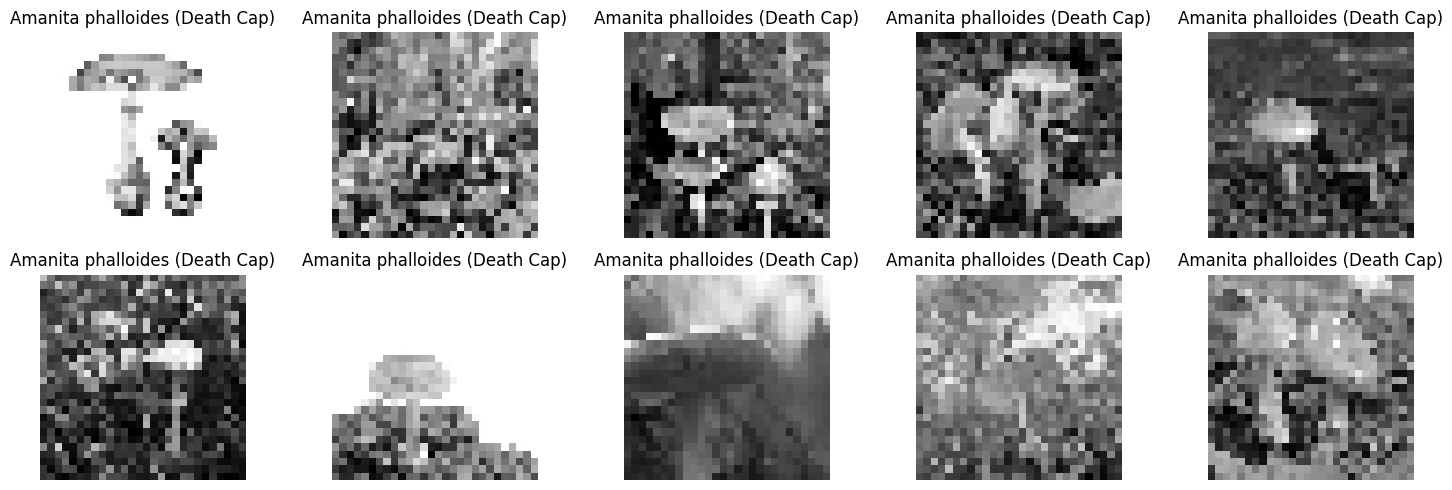

In [23]:
def show_sample_images(images, labels, class_names, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')  # Reshape for display
        plt.title(class_names[np.argmax(labels[i])])  # Get the class name from the label
        plt.axis('off')  # Hide axes
    plt.tight_layout()
    plt.show()

# Show sample images from the dataset
show_sample_images(x_train, y_train, class_names)


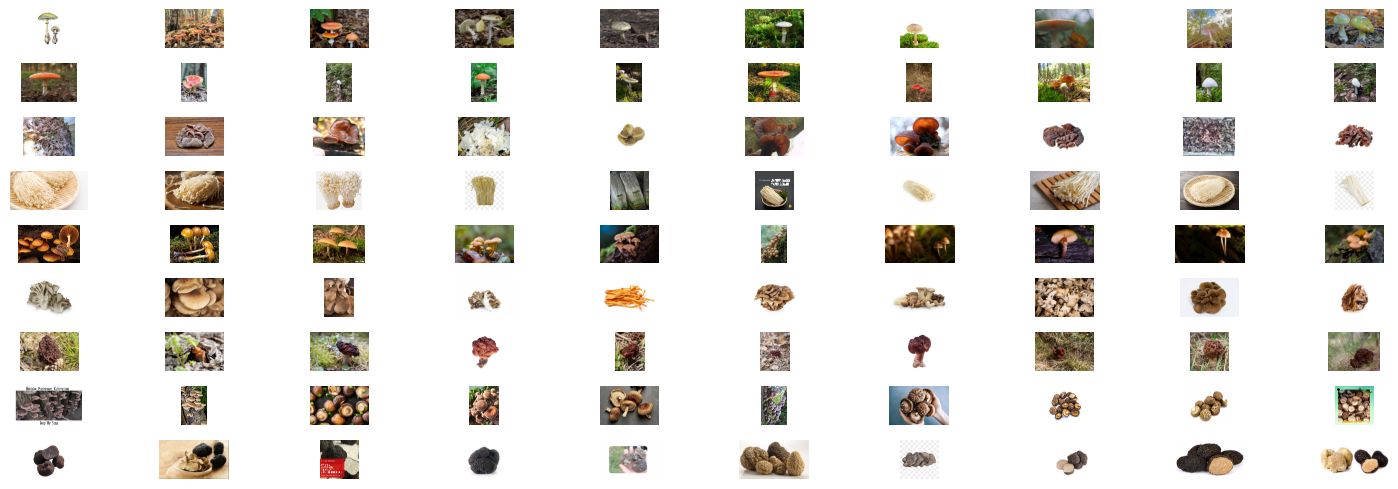

In [24]:
def show_original_images(data_path, num_samples=10):
    class_names = sorted(os.listdir(data_path))
    plt.figure(figsize=(15, 5))
    for i, class_name in enumerate(class_names):
        label_path = os.path.join(data_path, class_name)
        for img_file in os.listdir(label_path)[:num_samples]:  # Display only a few images from each class
            img_path = os.path.join(label_path, img_file)
            img = cv2.imread(img_path)
            plt.subplot(len(class_names), num_samples, i * num_samples + (list(os.listdir(label_path)).index(img_file) + 1))
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show original images
show_original_images(data_path)


# Step 2: ANN Model Configuration

In [17]:
# Define the number of classes based on your dataset
num_classes = 9  # or adjust to 10 if that's the correct number

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Flatten the 28x28 images into a 1D vector
    Dense(128, activation='relu'),      # Hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),       # Additional hidden layer
    Dense(num_classes, activation='softmax')  # Adjust the output layer to match the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Step 3: Train the Model

In [26]:
# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.1)


Epoch 1/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8696 - loss: 0.4251 - val_accuracy: 0.1765 - val_loss: 8.1117
Epoch 2/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9038 - loss: 0.3622 - val_accuracy: 0.2017 - val_loss: 8.0926
Epoch 3/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9000 - loss: 0.3422 - val_accuracy: 0.0420 - val_loss: 9.4602
Epoch 4/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8992 - loss: 0.3163 - val_accuracy: 0.1008 - val_loss: 9.2872
Epoch 5/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8617 - loss: 0.4336 - val_accuracy: 0.1092 - val_loss: 8.3717
Epoch 6/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9115 - loss: 0.2928 - val_accuracy: 0.1261 - val_loss: 8.9552
Epoch 7/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9291 - loss: 0.2562 - val_accuracy: 0.0336 - val_loss: 9.7804
Epoch 8/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9202 - loss: 0.2929 - val_accuracy: 0.2017 - val_loss:

# Step 4: Evaluate the Model

In [29]:
from tensorflow.keras.optimizers import Adam

# Compile the model with a different learning rate
optimizer = Adam(learning_rate=0.005)  # You can try different values here
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Retrain the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Re-evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5107 - loss: 3.4967 - val_accuracy: 0.0252 - val_loss: 6.6814
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6221 - loss: 0.9694 - val_accuracy: 0.1008 - val_loss: 8.5310
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7192 - loss: 0.8120 - val_accuracy: 0.0420 - val_loss: 11.2374
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7738 - loss: 0.6200 - val_accuracy: 0.1261 - val_loss: 14.0200
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7314 - loss: 0.8057 - val_accuracy: 0.1429 - val_loss: 11.6964
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7176 - loss: 0.7554 - val_accuracy: 0.1765 - val_loss: 9.8896
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6854 - loss: 0.8630 - val_accuracy: 0.3025 - val_loss: 10.7053
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7806 - loss: 0.6206 - val_accuracy: 0.1261 - val_l

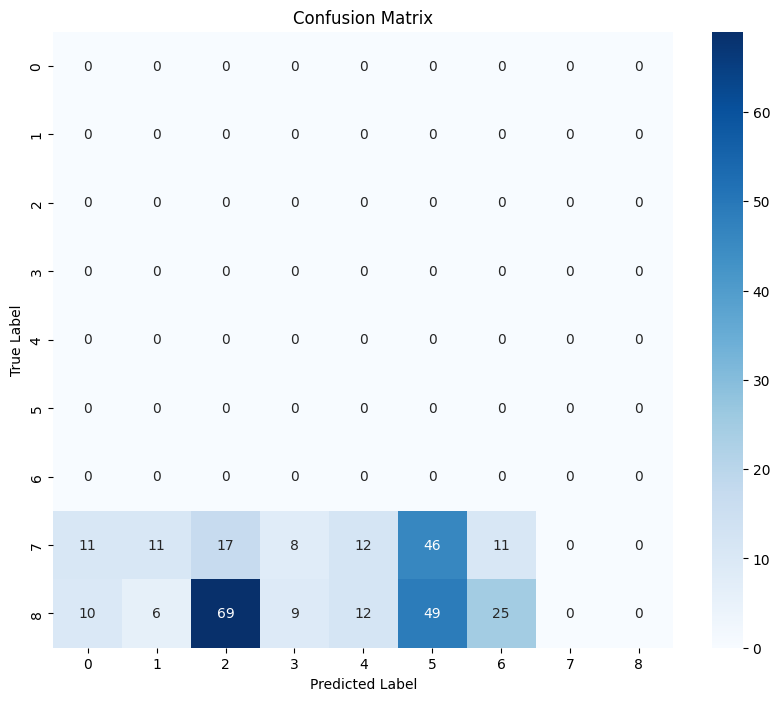

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00     116.0
           8       0.00      0.00      0.00     180.0

    accuracy                           0.00     296.0
   macro avg       0.00      0.00      0.00     296.0
weighted avg       0.00      0.00      0.00     296.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [30]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes))